In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Load BLAST output file
GCA5845_df = pd.read_csv('GCA_000005845.2_ASM584v2_genomic_blast_results.txt', delimiter='\t', header=None)

# Assign column names 
GCA5845_df.columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatches', 'gap_opens', 'q_start', 'q_end', 's_start', 's_end', 'evalue', 'bit_score']

GCA5845_df.head()

,qseqid,sseqid,pident,alignment_length,mismatches,gap_opens,q_start,q_end,s_start,s_end,evalue,bit_score
0,U00096.3,gb|U00096.1|+|2484373-2487967|ARO:3000833|evgS,100.000,3594,0,0,2484374,2487967,1,3594,0.0,6637
1,U00096.3,gb|U00096.3|-|481253-484403|ARO:3000216|acrB,100.000,3150,0,0,481254,484403,3150,1,0.0,5818
2,U00096.3,gb|U00096.3|-|481253-484403|ARO:3000216|acrB,73.758,3140,724,89,3415042,3418129,9,3100,0.0,1142
3,U00096.3,gb|U00096.1|+|2155262-2158385|ARO:3000793|mdtB,100.000,3123,0,0,2155263,2158385,1,3123,0.0,5768
4,U00096.3,gb|AP009048.1|+|2586250-2589364|ARO:3000491|acrD,100.000,3114,0,0,2587595,2590708,1,3114,0.0,5751


In [11]:
# Filter for genes with >/= 90 percentage identity
filtered_df = GCA5845_df[GCA5845_df['pident'] >= 90]
print(f"Filtered Results: {filtered_df.shape[0]} rows")

Filtered Results: 53 rows


In [17]:
# Extract ARO_Index and Gene name from sseqid
filtered_df['ARO_Index'] = filtered_df['sseqid'].str.extract(r'ARO:(\d+)')
filtered_df['Gene'] = filtered_df['sseqid'].str.extract(r'\|ARO:\d+\|([^|]+)')

# Rename column
filtered_df = filtered_df.rename(columns={'qseqid': 'ID'})

# Keep relevant columns
processed_df = filtered_df[['ID', 'ARO_Index', 'Gene', 'pident', 'alignment_length', 'mismatches', 'gap_opens', 'q_start', 'q_end', 's_start', 's_end', 'evalue', 'bit_score']]

# Save filtered and processd data to a new file
processed_df.to_csv('processed_GCA5845.2_blast_results.tsv', sep='\t', index=False)

## Visualizations

             Gene  Frequency
0            AcrE          1
1            AcrF          1
2            AcrS          1
3             CRP          1
4           EC-13          1
5           EC-14          1
6           EC-15          1
7           EC-16          1
8           EC-18          1
9           EC-19          1
10           EC-5          1
11           EC-8          1
12      Ecol_acrA          1
13  Ecol_ampC_BLA          1
14      Ecol_emrE          1
15      Ecol_mdfA          1
16           H-NS          1
17      Kpne_KpnH          1
18           PmrF          1
19      Sfle_acrA          1
20           TolC          1
21           YojI          1
22           acrB          1
23           acrD          1
24           bacA          1
25           cpxA          1
26           emrA          1
27           emrB          1
28           emrK          1
29           emrR          1
30           emrY          1
31           eptA          1
32           evgA          1
33           e

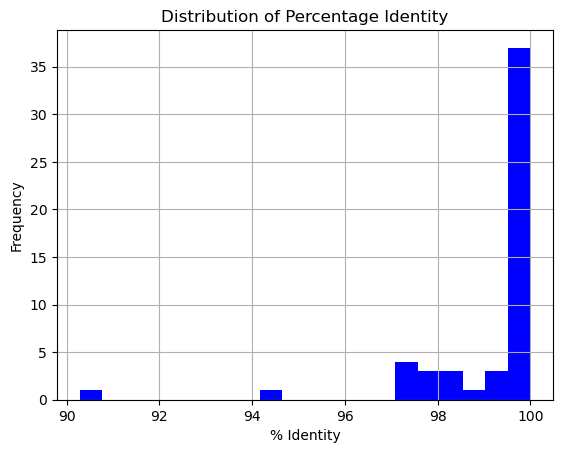

In [ ]:
# Visualize distribution of percentage identity
processed_df['pident'].hist(bins=20, color='blue')
plt.title('Distribution of Percentage Identity')
plt.xlabel('% Identity')
plt.ylabel('Frequency')
plt.show()


# Classifying AMR Genes